#### Google App Rating Analysis   By Jit Sarbadhikari

In [1]:
# Importing the required libraries


import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### 1. Load the data file using pandas.

In [2]:
inp=pd.read_csv('googleplaystore.csv')
inp.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


##### 2. Check for null values in the data. Get the number of null values for each column.

In [3]:
inp.info()

# As I can see there are some columns thats has null values..!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [4]:
inp.isnull().sum()

# Count of null values in each columns..!!

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

##### 3. Drop records with nulls in any of the columns.


In [5]:
inp.dropna(how='any',inplace=True)
inp.shape

(9360, 13)

##### 4. Variables seem to have incorrect type and inconsistent formatting. You need to fix them :

In [6]:
def new_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1000000
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1000
        return(x)
    else:
        return None

In [7]:
inp["Size"] = inp["Size"].map(new_size)

In [8]:
inp['Size'].isnull().sum()

1637

In [9]:
inp.Size.fillna(method = 'ffill', inplace = True)

In [10]:
inp['Size'].isnull().sum()

0

In [11]:
# 2. Reviews is a numeric field that is loaded as a string field. Convert it to numeric (int/float).
inp.Reviews = inp.Reviews.astype("float")

In [12]:
# 3. Installs field is currently stored as string and has values like 1,000,000+. 
# Treat 1,000,000+ as 1,000,000
# remove ‘+’, ‘,’ from the field, convert it to integer
def clean(val):
 return float(val.replace(",","").replace("+",""))

In [13]:
inp.Installs = inp.Installs.map(clean)

In [14]:
# 4. Price field is a string and has $ symbol. Remove ‘$’ sign, and convert it to numeric.

inp['Price'] = inp.Price.map(lambda x: 0 if x=='0' else float(x[1:]))

In [15]:
# Checking the data types after conversion..!!
inp.dtypes

App                object
Category           object
Rating            float64
Reviews           float64
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [16]:
# 5.Sanity checks:
# Average rating should be between 1 and 5 as only these values are allowed on the play store. Drop the rows that have a value outside this range.
# Reviews should not be more than installs as only those who installed can review the app. If there are any such records, drop them.
# For free apps (type = “Free”), the price should not be >0. Drop any such rows.

In [17]:
inp.Rating.describe()
# The values are within range..!! Min val is 1.0 and Max val is 5.0

count    9360.000000
mean        4.191838
std         0.515263
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

In [18]:
# Reviews should not be more than installs as only those who installed can review the app. 
# If there are any such records, drop them.
len(inp[inp.Reviews > inp.Installs])

7

In [19]:
inp=inp[inp.Reviews < inp.Installs].copy()

In [20]:
inp.shape

(9351, 13)

In [21]:
# For free apps (type = “Free”), the price should not be >0. Drop any such rows.
len(inp[(inp.Type == "Free") & (inp.Price> 0)])

0

#### 5. Performing univariate analysis :

Text(0.5, 0, 'Price')

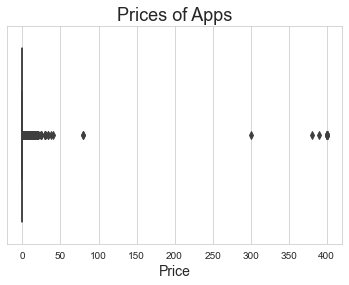

In [22]:
# Boxplot for Price
# Are there any outliers? Think about the price of usual apps on Play Store.
sns.set_style(style='whitegrid')
sns.boxplot(inp['Price'])
plt.title('Prices of Apps', fontsize=18)
plt.xlabel('Price', fontsize=14)
# I can see that there are many outliers in Price column

Text(0.5, 0, 'Reviews')

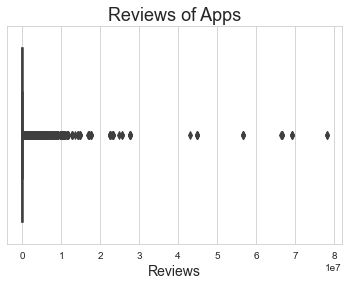

In [23]:
# Boxplot for Reviews
#Are there any apps with very high number of reviews? Do the values seem right?
sns.boxplot(inp['Reviews'])
plt.title('Reviews of Apps', fontsize=18)
plt.xlabel('Reviews', fontsize=14)
# I can see that there are many outliers in Price column

Text(0, 0.5, 'Frequency')

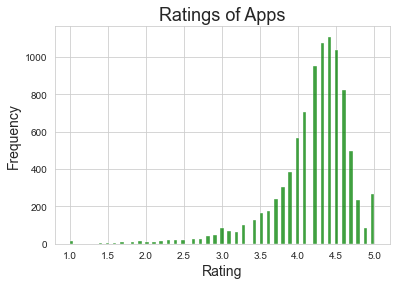

In [24]:
# Histogram for Rating
# How are the ratings distributed? Is it more toward higher ratings?
sns.histplot(inp['Rating'],color='green')
plt.title('Ratings of Apps', fontsize=18)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# Rating is distributed as left skewed which we can say as Negetively skewed and it is towards higher ratings.
# It is looking a very good distribution as left skewed..!!

Text(0, 0.5, 'Frequency')

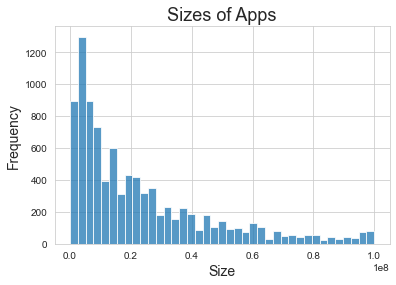

In [25]:
# Histogram for Size
sns.histplot(inp['Size'], palette='Blue')
plt.title('Sizes of Apps', fontsize=18)
plt.xlabel('Size', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
# I can see that the distribution is a right skewed and it starts from higher Size and continue to lower Size.

#### 6. Outlier treatment:
Price: From the box plot, it seems like there are some apps with very high price. A price of $200 for an application on the Play Store is very high and suspicious!


In [26]:
# Check out the records with very high price
# Is 200 indeed a high price?
# Drop these as most seem to be junk apps
len(inp[inp.Price > 200])

15

In [27]:
# There are 15 apps with price greater than 200..!!
inp[inp.Price > 200]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6.0,1500000.0,100.0,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26000000.0,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7300000.0,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1800000.0,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8700000.0,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411.0,2600000.0,10000.0,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867.0,4700000.0,50000.0,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41.0,2900000.0,1000.0,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93.0,22000000.0,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,965000.0,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [28]:
# Dropping the junk apps..!!
inp=inp[inp.Price<200].copy()

In [29]:
inp.shape

(9336, 13)

In [30]:
# Reviews: Very few apps have very high number of reviews. These are all star apps that don’t help with the analysis and, 
# in fact, will skew it. Drop records having more than 2 million reviews.
len(inp[inp.Reviews>=2000000])

453

In [31]:
inp=inp[inp.Reviews<=2000000].copy()

In [32]:
inp.shape

(8883, 13)

In [33]:
# Installs: There seems to be some outliers in this field too. 
# Apps having very high number of installs should be dropped from the analysis.
# Find out the different percentiles – 10, 25, 50, 70, 90, 95, 99
inp.Installs.quantile([0.1, 0.25, 0.5, 0.70, 0.9, 0.95, 0.99])

0.10         1000.0
0.25        10000.0
0.50       500000.0
0.70      1000000.0
0.90     10000000.0
0.95     10000000.0
0.99    100000000.0
Name: Installs, dtype: float64

In [34]:
len(inp[inp.Installs >= 10000000])

1627

In [35]:
inp=inp[inp.Installs<=10000000].copy()

In [36]:
inp.shape

(8494, 13)

#### 7. Bivariate analysis: 
Let’s look at how the available predictors relate to the variable of interest, i.e., our target variable rating. Make scatter plots (for numeric
features) and box plots (for character features) to assess the relations between rating and the other features.


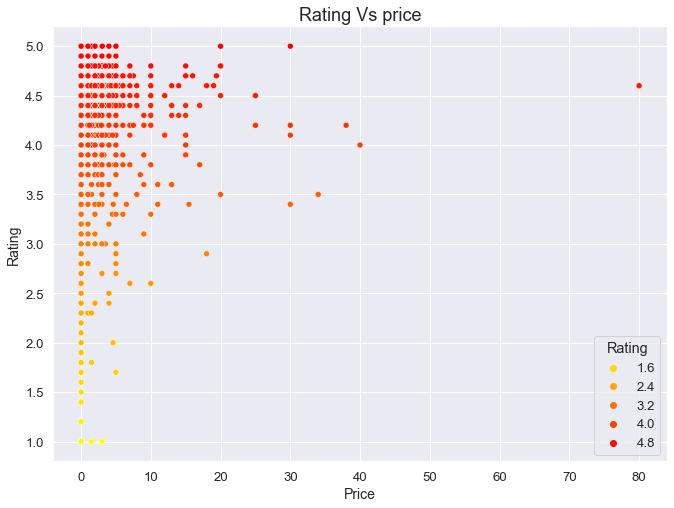

In [37]:
# Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?
plt.figure(figsize=(11,8))
sns.set_style(style='whitegrid',)
sns.set(font_scale=1.2)
sns.scatterplot(x=inp['Price'], y=inp['Rating'],hue= inp['Rating'],palette='autumn_r')
plt.title('Rating Vs price', fontsize=18)
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Price', fontsize=14)
plt.show()

##### From the above scatterplot i can see that there is not a very clean pattern, it does look that the higher priced apps have better rating. Although, there are not a lot of apps which are high priced, but the pattern is apparent.


<AxesSubplot:xlabel='Size', ylabel='Rating'>

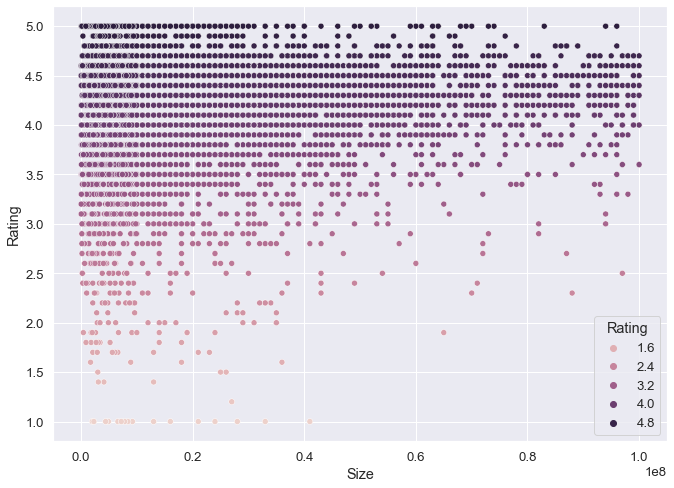

In [38]:
# Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?
plt.figure(figsize=(11,8))
sns.scatterplot(inp.Size,inp.Rating,hue=inp.Rating)

##### Again, not a very clean pattern, but it does look like heavier apps are better rated.


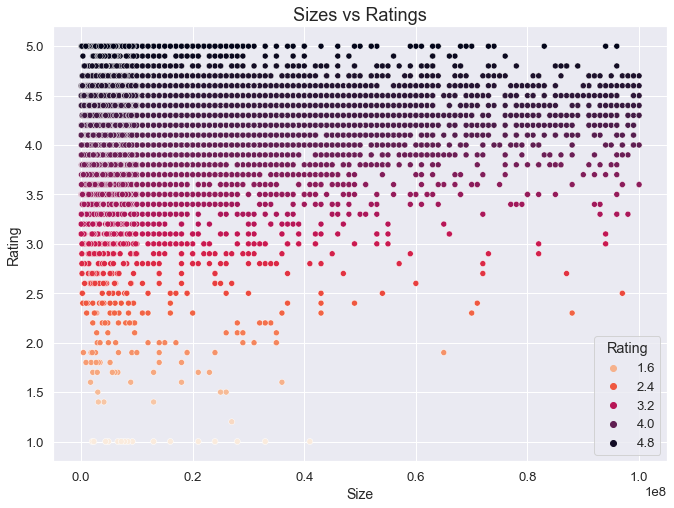

In [39]:
# 3. Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?
plt.figure(figsize=(11,8))
sns.scatterplot(x=inp['Size'], y=inp['Rating'], hue= inp['Rating'],palette='rocket_r')
plt.title('Sizes vs Ratings', fontsize=18)
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Size', fontsize=14)
plt.show()

##### No clear pattern. There are few low rated apps among the popular ones (maybe poor ones won’t get so popularity), after a certain point, the rating does not depend on the popularity.


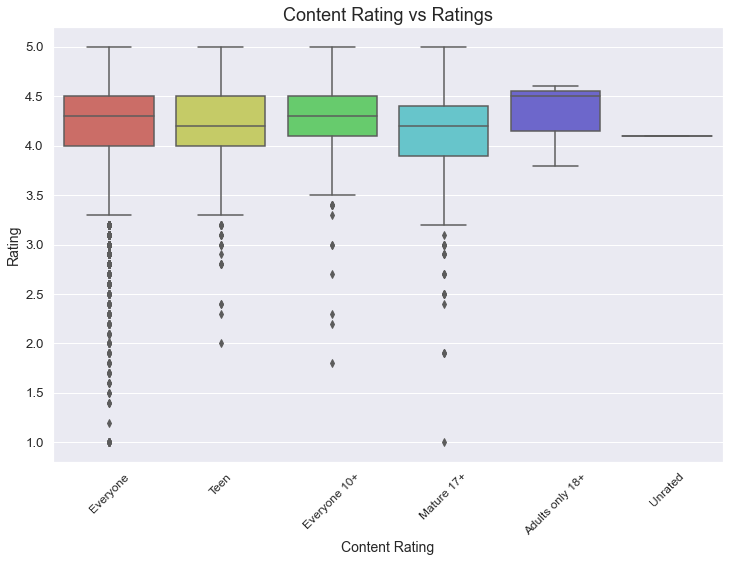

In [40]:
# Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?
plt.figure(figsize= (12,8))
sns.boxplot(x = 'Content Rating', y = 'Rating', data = inp, palette='hls')
plt.title('Content Rating vs Ratings', fontsize=18)
plt.xticks(fontsize=12, rotation='45')
plt.ylabel('Rating',fontsize=14)
plt.xlabel('Content Rating', fontsize=14)
plt.show()

##### While the median rating for most others is similar, the rating for “Adults Only 18+” is the highest.

Text(0, 0.5, 'Rating')

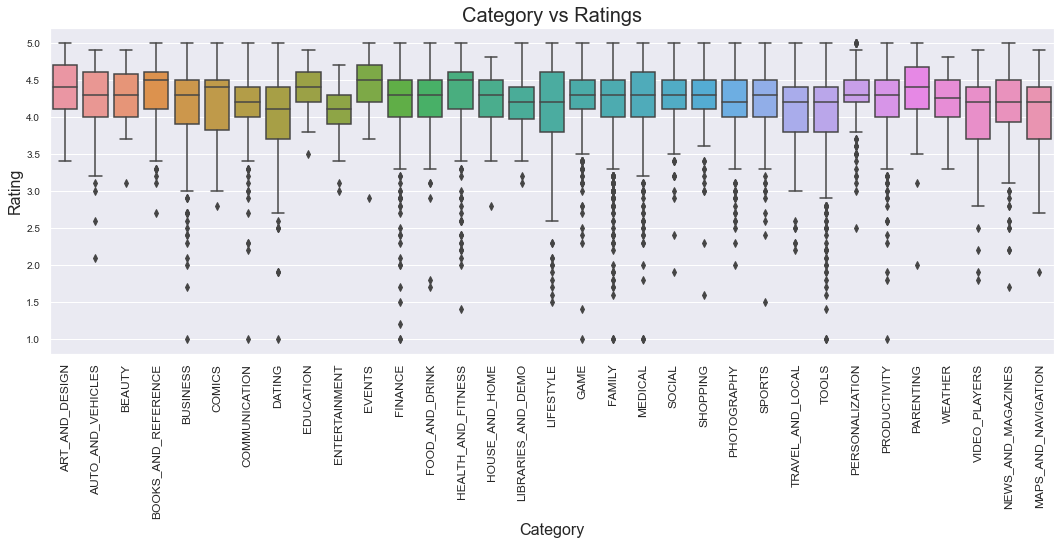

In [41]:
# Make boxplot for Ratings vs. Category
# Which genre has the best ratings?
plt.figure(figsize= (18,6))
sns.boxplot(x = 'Category', y = 'Rating', data = inp)
plt.title('Category vs Ratings', fontsize=20)
plt.xticks(fontsize=12, rotation = 'vertical')
plt.yticks(fontsize=10)
plt.xlabel("Category",fontsize=16)
plt.ylabel("Rating",fontsize=16)

###### Apps around Health & Fitness, Books and Reference, Events seem to have the highest median ratings.

#### 8. Data preprocessing

- For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.


In [42]:
# Reviews and Install have some values that are still relatively very high. Before building a linear regression model, you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.
inp1 = inp.copy(deep=True)

In [43]:
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700000.0,5000000.0,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800000.0,100000.0,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167.0,5600000.0,50000.0,Free,0.0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up


In [44]:
inp1.Reviews=inp1.Reviews.apply(func=np.log1p)
inp1.Installs=inp1.Installs.apply(func=np.log1p)

array([[<AxesSubplot:title={'center':'Reviews'}>,
        <AxesSubplot:title={'center':'Installs'}>]], dtype=object)

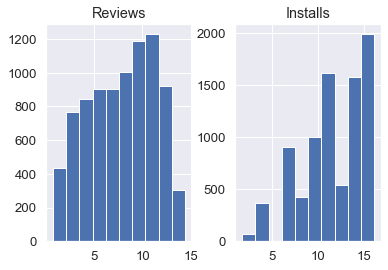

In [45]:
inp1.hist(column=['Reviews','Installs'])

In [46]:
# Drop columns App, Last Updated, Current Ver, and Android Ver. These variables are not useful for our task.
inp1.drop(["App", "Last Updated", "Current Ver", "Android Ver"], axis=1, inplace=True)

In [47]:
inp1.columns

Index(['Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres'],
      dtype='object')

In [48]:
inp1.shape

(8494, 9)

In [49]:
# Get dummy columns for Category, Genres, and Content Rating. This needs to be done as the models do not understand categorical data, and all data should be n
# Dummy encoding is one way to convert character fields to numeric. Name of dataframe should be inp2.
inp2 = pd.get_dummies(inp1,drop_first=True)

In [50]:
print(inp2.columns)

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price',
       'Category_AUTO_AND_VEHICLES', 'Category_BEAUTY',
       'Category_BOOKS_AND_REFERENCE', 'Category_BUSINESS', 'Category_COMICS',
       ...
       'Genres_Tools', 'Genres_Tools;Education', 'Genres_Travel & Local',
       'Genres_Travel & Local;Action & Adventure', 'Genres_Trivia',
       'Genres_Video Players & Editors',
       'Genres_Video Players & Editors;Creativity',
       'Genres_Video Players & Editors;Music & Video', 'Genres_Weather',
       'Genres_Word'],
      dtype='object', length=157)


#### 9. Train test split and apply 70-30 split. Name the new dataframes df_train and df_test.


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
# Splitting 70% of the data to the training set while 30% of the data to test set using below code.
X=inp2.iloc[:,1:]
y=inp2.iloc[:,:1]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=1)
X_train.shape,X_test.shape

((5945, 156), (2549, 156))

In [53]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()
from statsmodels.api import OLS
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as ms

In [54]:
# 10. Separate the dataframes into X_train, y_train, X_test, y_test
y_train = y_train.pop("Rating")
X_train = X_train

In [55]:
y_test = y_test.pop("Rating")
X_test = X_test

#### 11 . Model building

In [56]:
# Use linear regression as the technique
Model=linreg.fit(X_train, y_train)
predict=linreg.predict(X_test)
y_test=np.array(y_test)
predict=np.array(predict)
a=pd.DataFrame({'Actual':y_test.flatten(),'Predicted':predict.flatten()});a.head(10)

,Actual,Predicted
0,3.7,4.292656
1,3.0,3.751739
2,3.2,3.999185
3,4.0,4.136414
4,4.2,4.103574
5,5.0,3.804942
6,3.9,4.015669
7,4.7,4.469564
8,4.5,4.279194
9,4.2,4.226456


<AxesSubplot:>

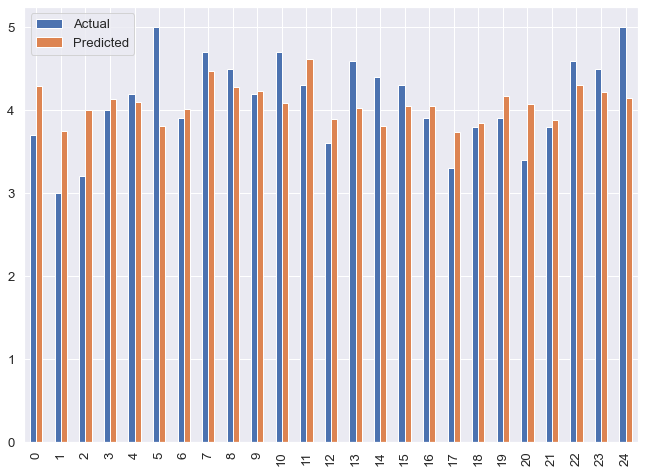

In [57]:
fig=a.head(25)
fig.plot(kind='bar',figsize=(11,8))

##### From the above figure we can observe here that the model has returned pretty good prediction results.


In [58]:
# Report the R2 on the train set
print('R2_Score =',r2_score(y_test,predict))

R2_Score = 0.14132279175074536


In [59]:
print('Prediction Error Percentage is',round((0.50/np.mean(y_test))*100))

Prediction Error Percentage is 12


In [60]:
print('Root Mean Squared Error=',np.sqrt(ms(y_test,predict)))

Root Mean Squared Error= 0.5074075539565124


In [61]:
y_train_pred= linreg.predict(X_train)
r2_score(y_train, y_train_pred)

0.16394969267780413